<a href="https://colab.research.google.com/github/spuertoUAO/Taller_3/blob/main/Taller_3_%C3%81rboles_de_decisi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Taller de Modelado de Aprendizaje Automático con Árboles de Decisión y Métodos de Ensamble***

Entrenando modelos...

Evaluación de modelos:

Evaluación del modelo de Árbol de Decisión:


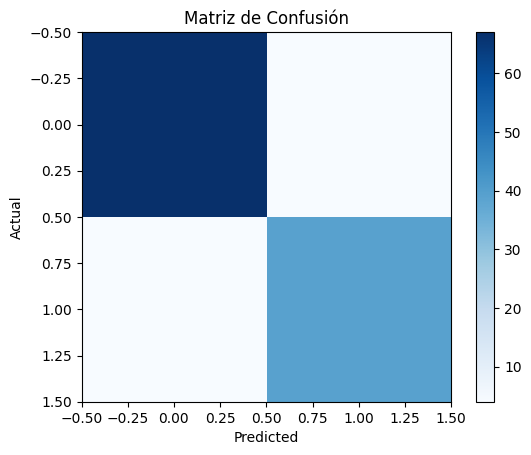

Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.94      0.94      0.94        71
           M       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



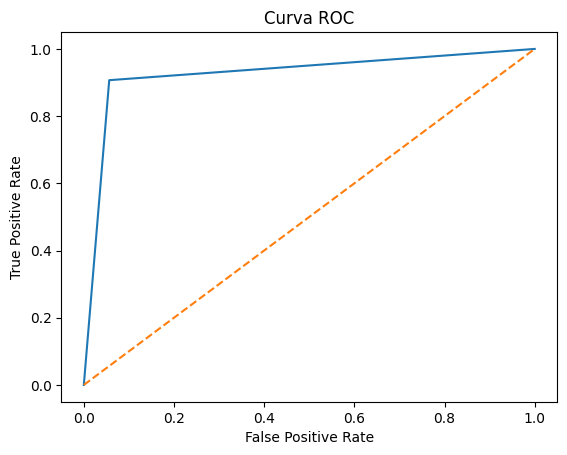


Evaluación del modelo de Random Forest:


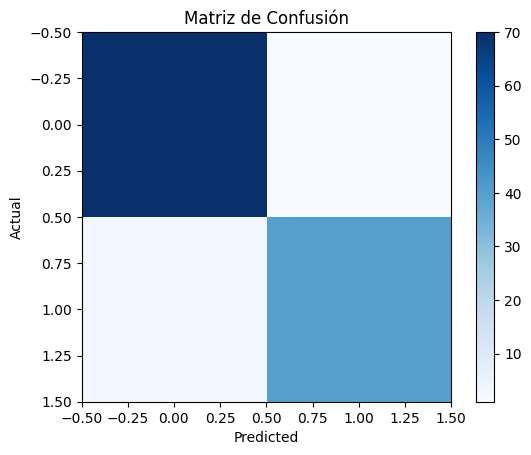

Reporte de clasificación:
               precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



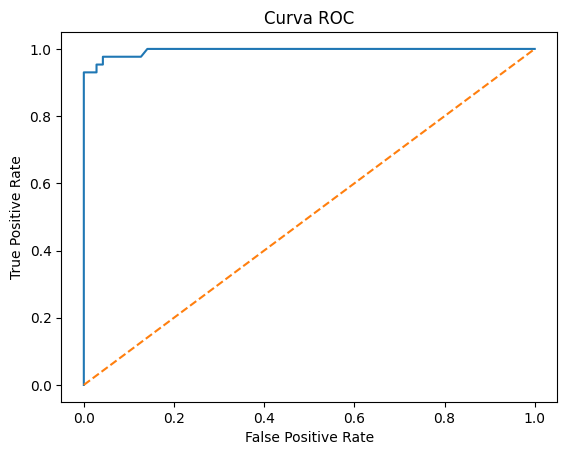

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Carga del dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area",
                "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points",
                "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter",
                "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points",
                "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
                "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
                "Worst Symmetry", "Worst Fractal Dimension"]
df = pd.read_csv(url, header=None, names=column_names)

# Preparación de Datos
df.drop("ID", axis=1, inplace=True)

# División del conjunto de datos en entrenamiento y prueba
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento de Modelos: Entrena al menos tres modelos de clasificación, incluyendo un árbol de decisión y un método de ensamble.
print("Entrenando modelos...")
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

### Evaluación de Modelos: Utiliza la matriz de confusión para evaluar los modelos y discute su significado. Adicional a la matriz de confusión se harán reportes de Clasificación y análisis de la Curva ROC.
print("\nEvaluación de modelos:")

# Matriz de Confusión
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Reportes de Clasificación
def print_classification_report(y_true, y_pred):
    print("Reporte de clasificación:\n", classification_report(y_true, y_pred))

# Curva ROC
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curva ROC')
    plt.show()

# Codificar las etiquetas categóricas
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Evaluación del modelo de Árbol de Decisión
print("\nEvaluación del modelo de Árbol de Decisión:")
y_pred_dt = decision_tree.predict(X_test)
plot_confusion_matrix(y_test, y_pred_dt)
print_classification_report(y_test, y_pred_dt)
plot_roc_curve(y_test_encoded, decision_tree.predict_proba(X_test)[:,1])

# Evaluación del modelo de Random Forest
print("\nEvaluación del modelo de Random Forest:")
y_pred_rf = random_forest.predict(X_test)
plot_confusion_matrix(y_test, y_pred_rf)
print_classification_report(y_test, y_pred_rf)
plot_roc_curve(y_test_encoded, random_forest.predict_proba(X_test)[:,1])


Este programa carga el conjunto de datos de cáncer de mama de Wisconsin, entrena un árbol de decisión y un modelo de Random Forest, y luego evalúa ambos modelos utilizando la matriz de confusión, los reportes de clasificación y la curva ROC.

 Se utiliza la clase DecisionTreeClassifier de scikit-learn para entrenar un árbol de decisión en la línea 36 del programa. Este árbol de decisión se utiliza para realizar predicciones en el conjunto de prueba y se evalúa su rendimiento utilizando la matriz de confusión, los reportes de clasificación y la curva ROC.

 Se utiliza la clase RandomForestClassifier de scikit-learn para entrenar un modelo de Random Forest en la línea 37 del programa. Un Random Forest es un método de ensamble que se basa en la construcción de múltiples árboles de decisión durante el entrenamiento y combina sus predicciones para obtener un resultado más robusto y generalizable. Al igual que con el árbol de decisión, se evalúa el rendimiento del modelo de Random Forest utilizando la matriz de confusión, los reportes de clasificación y la curva ROC.